In [1]:

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 784 
hidden_size = 256 
num_classes = 10
num_epochs = 2
batch_size = 64
learning_rate = 0.001


In [3]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [4]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [6]:

import torch.optim as optim

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/2], Loss: 0.0888
Epoch [2/2], Loss: 0.1742


In [7]:

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the model on test images: {accuracy:.2f}%')


Accuracy of the model on test images: 97.12%


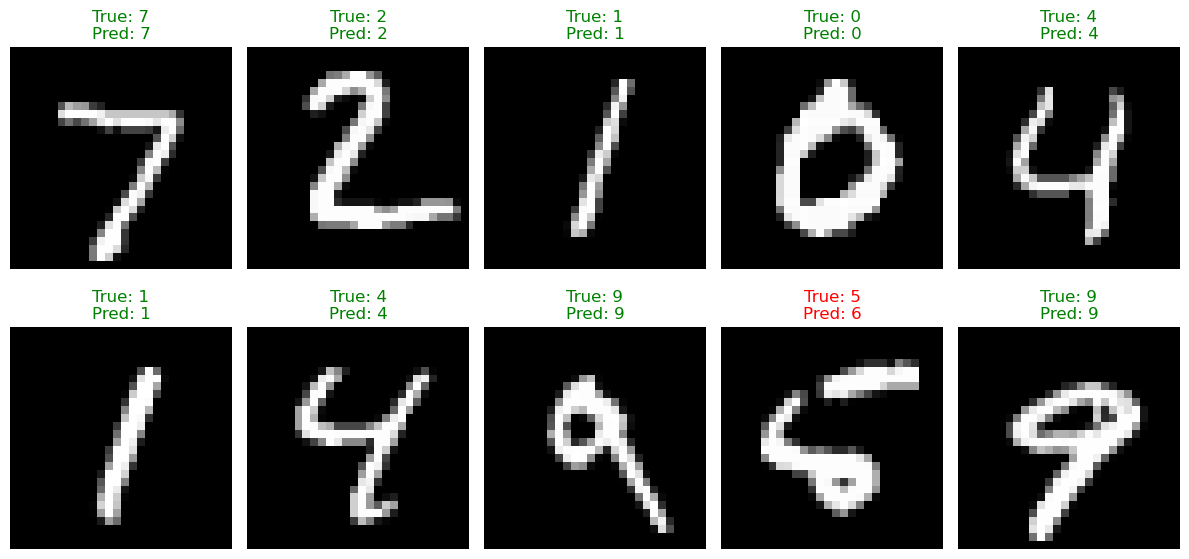

In [8]:

import matplotlib.pyplot as plt

classes = [str(i) for i in range(10)]

model.eval()
with torch.no_grad():
    images, labels = next(iter(test_loader))
    images_flat = images.reshape(-1, 28*28).to(device)
    outputs = model(images_flat)
    _, predicted = torch.max(outputs, 1)

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i][0], cmap='gray')
        color = 'green' if predicted[i] == labels[i] else 'red'
        plt.title(f"True: {classes[labels[i]]}\nPred: {classes[predicted[i]]}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()